<a href="https://colab.research.google.com/github/anusurabhi/Data-Science/blob/main/chest%20xray%20classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [115]:
# https://www.kaggle.com/preetviradiya/covid19-radiography-dataset
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [61]:
data_dir = "C:\\Users\\anu\\Desktop\\Udemy\\lung_images\\COVID-19_Radiography_Dataset\\"
os.listdir(data_dir)

['test', 'train']

In [62]:
train_path = data_dir + "train\\"
test_path = data_dir + "test\\"

In [63]:
first_image = os.listdir(train_path+"COVID")[0]

In [64]:
first_image_to_nparray = imread(train_path+"COVID\\"+first_image)
first_image_to_nparray.shape

(299, 299)

In [65]:
first_image_to_nparray = first_image_to_nparray.reshape(299,299,1)

In [66]:
first_image_to_nparray.shape

(299, 299, 1)

In [67]:
first_image_to_nparray.max()

0.9882353

In [68]:
first_image_to_nparray.min()

0.0

In [69]:
def check_dimensions(path):
  dim1 = []
  dim2 = []
  for image in os.listdir(path):
    img = imread(path+"\\"+image)
    d1, d2 = img.shape
    dim1.append(d1)
    dim2.append(d2)
  return dim1, dim2

In [73]:
# Checking dimension of COVID pictures
covid_width, covid_height = check_dimensions(train_path + "COVID")
normal_width, normal_height = check_dimensions(train_path + "Normal")
# viral_width, viral_height = check_dimensions(train_path + "Viral Pneumonia")

covid_width = np.mean(covid_width)
covid_height = np.mean(covid_height)

normal_width = np.mean(normal_width)
normal_height = np.mean(normal_height)

viral_width = np.mean(viral_width)
viral_height = np.mean(viral_height)


In [76]:
# covid_width
# covid_height
# normal_width
# normal_height
# viral_width
# viral_height

299.0

In [77]:
# All having same width and height

image_shape = (299, 299, 1)

In [98]:
# Use ImageDataGenerator
image_gen = ImageDataGenerator(rotation_range=20,
                               width_shift_range=.1,
                               height_shift_range=.1,
                               shear_range=.1,
                               fill_mode='nearest',
                               horizontal_flip=True,
                               zoom_range=0.1)

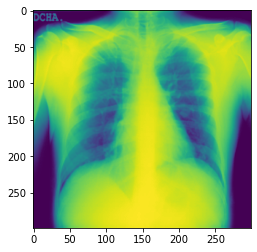

In [99]:
# Test a transformation of image
plt.imshow(first_image_to_nparray)

In [104]:
# Edited version
first_image_distorted = image_gen.random_transform(first_image_to_nparray)

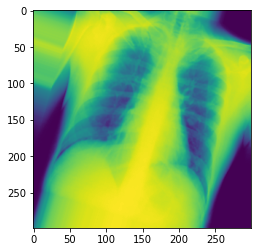

In [105]:
plt.imshow(first_image_distorted)

In [111]:
# Now Create a model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(2,2), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(2,2), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(2,2), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [113]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 298, 298, 32)      160       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 148, 148, 64)      8256      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 73, 73, 128)       32896     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 165888)           

In [116]:
early_stop = EarlyStopping(monitor='val_loss', patience=5) # This is setting up early stopping

In [117]:
batch_size = 16
target_size = image_shape[:2]

In [119]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                                target_size=target_size,
                                                class_mode='binary',
                                                batch_size=batch_size,
                                                shuffle=True,
                                                color_mode='grayscale')

Found 12123 images belonging to 3 classes.


In [121]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                                target_size=target_size,
                                                class_mode='binary',
                                                batch_size=batch_size,
                                                shuffle=False,
                                                color_mode='grayscale')

Found 3030 images belonging to 3 classes.


In [122]:
train_image_gen.class_indices

{'COVID': 0, 'Normal': 1, 'Viral Pneumonia': 2}

In [124]:
results = model.fit(train_image_gen,
                              epochs=50,
                              validation_data=(test_image_gen),
                              callbacks=[early_stop])

Epoch 1/50
758/758 [==============================] - 762s 1s/step - loss: -19986868.0000 - accuracy: 0.6602 - val_loss: -126444336.0000 - val_accuracy: 0.6723
Epoch 2/50
758/758 [==============================] - 770s 1s/step - loss: -2642852608.0000 - accuracy: 0.6697 - val_loss: -7159661056.0000 - val_accuracy: 0.6733
Epoch 3/50
758/758 [==============================] - 744s 981ms/step - loss: -35172450304.0000 - accuracy: 0.6726 - val_loss: -75314757632.0000 - val_accuracy: 0.6785
Epoch 4/50
758/758 [==============================] - 761s 1s/step - loss: -175416164352.0000 - accuracy: 0.6716 - val_loss: -302930558976.0000 - val_accuracy: 0.6779
Epoch 5/50
758/758 [==============================] - 780s 1s/step - loss: -515274276864.0000 - accuracy: 0.6698 - val_loss: -815584509952.0000 - val_accuracy: 0.6746
Epoch 6/50
758/758 [==============================] - 756s 998ms/step - loss: -1222170116096.0000 - accuracy: 0.6699 - val_loss: -1590087385088.0000 - val_accuracy: 0.6812
Epo

KeyboardInterrupt: ignored